<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\laksh\AppData\Local\Temp\ipykernel_20948\4212462140.py:9: SyntaxWarning: invalid escape sequence '\D'
  file_path = f"C:\\Users\\laksh\Downloads\\code alpha\\task 2\\Unemployment_Rate_upto_11_2020.csv"


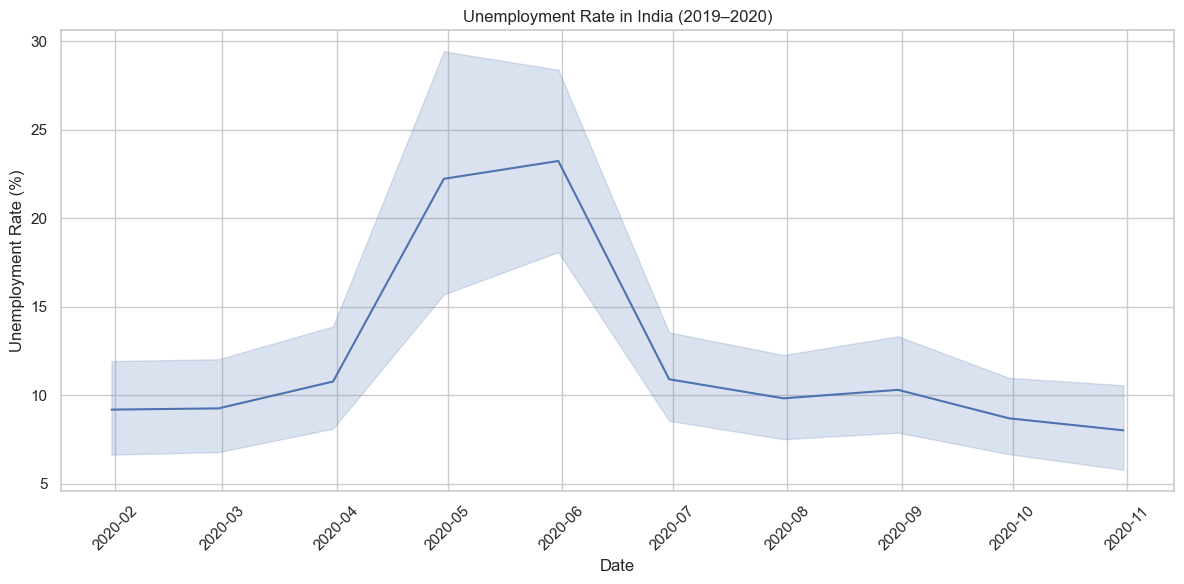

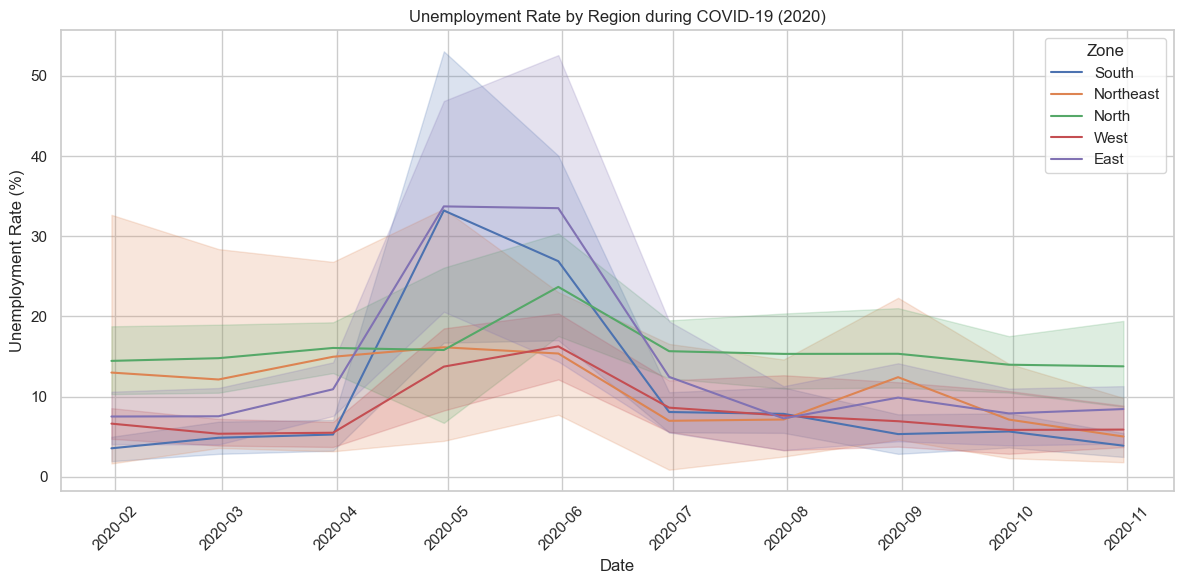

C:\Users\laksh\AppData\Local\Temp\ipykernel_20948\4212462140.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


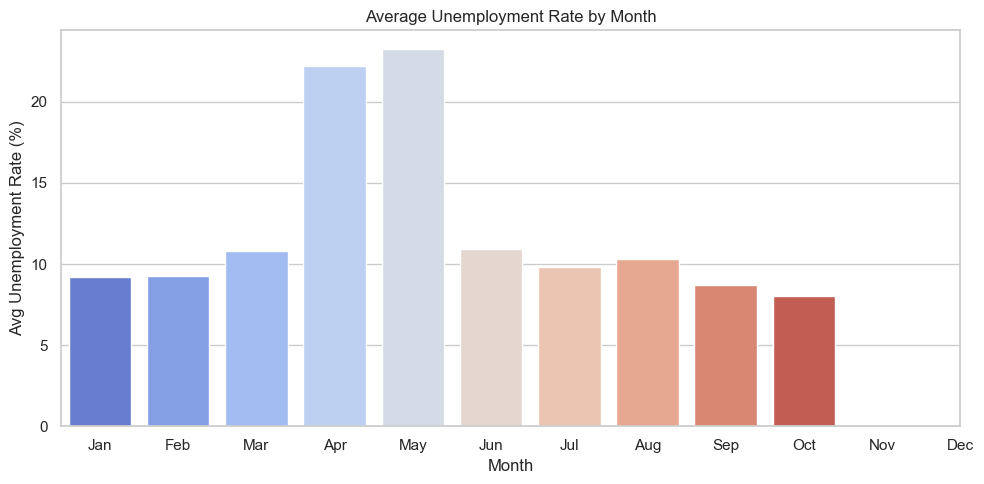

C:\Users\laksh\AppData\Local\Temp\ipykernel_20948\4212462140.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment_Rate', y='State', data=top_april_states, palette='Reds_r')


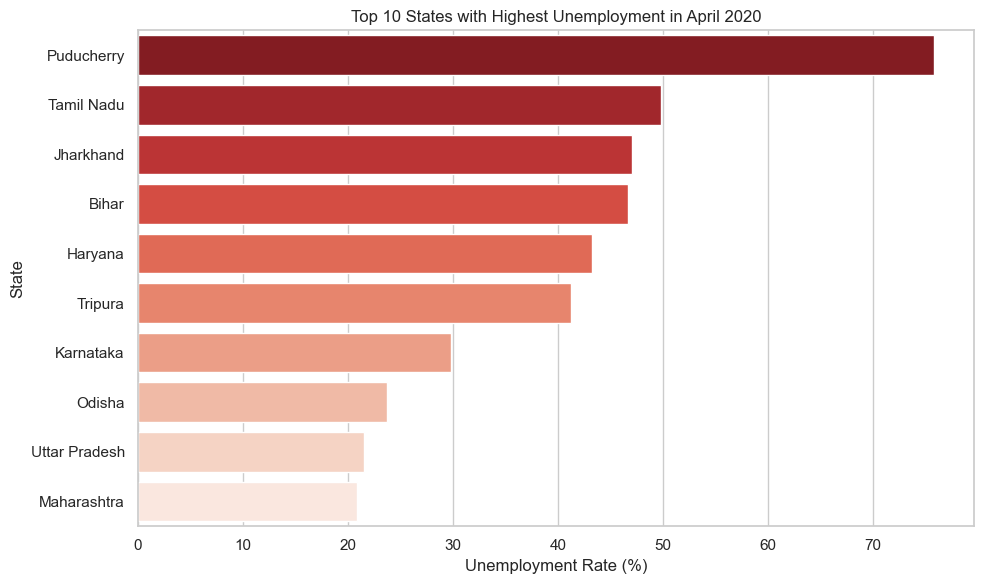

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display style
sns.set(style="whitegrid")

# File paths
file_path = f"C:\\Users\\laksh\Downloads\\code alpha\\task 2\\Unemployment_Rate_upto_11_2020.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Rename for clarity
df.rename(columns={
    'Region': 'State',
    'Region.1': 'Zone',
    'Date': 'Date',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Convert date to datetime
# Clean up and parse Date properly
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), format="%d-%m-%Y", errors='coerce')


# Add Month and Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Sort by date
df.sort_values(by='Date', inplace=True)

# Unemployment Trend in India
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title("Unemployment Rate in India (2019–2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# COVID-19 Impact (2020 Focus)
df_2020 = df[df['Year'] == 2020]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', hue='Zone', data=df_2020)
plt.title("Unemployment Rate by Region during COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Pattern (Seasonal Trends)
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Top Affected States in April 2020
april_2020 = df_2020[df_2020['Date'].dt.month == 4]
top_april_states = april_2020.sort_values(by='Unemployment_Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment_Rate', y='State', data=top_april_states, palette='Reds_r')
plt.title("Top 10 States with Highest Unemployment in April 2020")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()
